In [2]:
!pip install emoji
!pip install langdetect
!pip install contractions
!pip install nltk



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=840e1af3efb1f0643a9dfc4464708dfec542c67558a25166596760766b7fb789
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.2 MB/s eta 0:00:00


In [3]:
# Libraries for general purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Text cleaning
import re
import string
import emoji
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet') #NLP processing
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from string import punctuation


# Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from langdetect import detect, LangDetectException
import contractions
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display
from tabulate import tabulate

#EDA
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# `Dataset'


In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#import dataset
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/cyberbullying_tweets.csv")

In [6]:
#display first 5 rows in dataset
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [7]:
#dispaly data type and sum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [8]:
print("cyberbullying tweet set shape: {}". format(df.shape))

cyberbullying tweet set shape: (47692, 2)


# Data Cleaning

In [9]:
#Display total of missing value
df.duplicated().sum()

36

In [10]:
#Removing the duplicate values
df = df[~df.duplicated()]

In [11]:
#Check again missing value after cleaning
df.duplicated().sum()

0

In [12]:
#total after duplicate removal 47692 - 47656 = 36
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47656 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47656 non-null  object
 1   cyberbullying_type  47656 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [13]:
df = df.rename(columns={'tweet_text' : 'tweets', 'cyberbullying_type': 'cyberbullyType'})

In [14]:
df.cyberbullyType.value_counts()

cyberbullyType
religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: count, dtype: int64

In [15]:
#tweets labelled as other_cyberbullying have been removed. This class is unbalance and unable to label compare to other classes.
#after dropping class, display the remaining class
df = df[df["cyberbullyType"]!="other_cyberbullying"]
df.cyberbullyType.value_counts()

cyberbullyType
religion             7997
age                  7992
ethnicity            7959
gender               7948
not_cyberbullying    7937
Name: count, dtype: int64

In [16]:
class_mapping = {
    'age': 'minor',
    'ethnicity': 'racism'
}
df['cyberbullyType'] = df['cyberbullyType'].replace(class_mapping)

In [17]:
df.cyberbullyType.value_counts()

cyberbullyType
religion             7997
minor                7992
racism               7959
gender               7948
not_cyberbullying    7937
Name: count, dtype: int64

In [18]:
# emoji_pattern = re.compile("["
#                            u"\U0001F600-\U0001F64F"  # emoticons
#                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            u"\U00002500-\U00002BEF"  # chinese char
#                            u"\U00002702-\U000027B0"
#                            u"\U00002702-\U000027B0"
#                            u"\U000024C2-\U0001F251"
#                            u"\U0001f926-\U0001f937"
#                            u"\U00010000-\U0010ffff"
#                            u"\u2640-\u2642"
#                            u"\u2600-\u2B55"
#                            u"\u200d"
#                            u"\u23cf"
#                            u"\u23e9"
#                            u"\u231a"
#                            u"\ufe0f"  # dingbats
#                            u"\u3030"
#                            ":p"                   # Add :p emoji
#                            "]+", flags=re.UNICODE)

# # Check for emojis in the tweet_text column
# df['has_emoji'] = df['tweets'].apply(lambda x: bool(emoji_pattern.search(x)))


# # Display the DataFrame
# print(df[['tweets', 'has_emoji']])

In [19]:
# # Count the number of tweets with and without emojis
# emoji_counts = df['has_emoji'].value_counts()

# # Plot
# plt.figure(figsize=(8, 6))
# bars = emoji_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
# plt.title('Number of Tweets with and without Emojis')
# plt.xlabel('Has Emoji')
# plt.ylabel('Count')
# plt.xticks([0, 1], ['No', 'Yes'], rotation=0)

# # Annotate bars with count values
# for i in range(len(emoji_counts)):
#     plt.text(i, emoji_counts[i], str(emoji_counts[i]), ha='center', va='bottom')

# plt.show()

In [20]:
# Clean emojis from text
def strip_emoji(text):
    return emoji.demojize(text)

# Remove punctuations, stopwords, links, mentions and new line characters
def strip_all_entities(text, stop_words):
    text = re.sub(r'\r|\n', ' ', text.lower())  # Replace newline and carriage return with space, and convert to lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)  # Remove links and mentions
    text = re.sub(r'[^\x00-\x7f]', '', text)  # Remove non-ASCII characters
    banned_list = string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Filter special characters such as & and $ present in some words
def filter_chars(text):
    return ' '.join('' if ('$' in word) or ('&' in word) else word for word in text.split())

# Remove multiple spaces
def remove_mult_spaces(text):
    return re.sub(r"\s\s+", " ", text)

# Function to check if the text is in English, and return an empty string if it's not
def filter_non_english(text):
    try:
        lang = detect(text)
    except LangDetectException:
        lang = "unknown"
    return text if lang == "en" else ""

# Apply the filter_non_english function to your text data
df['text_clean'] = df['tweets'].apply(filter_non_english)

# Expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Lemmatize words
def lemmatize(text):
   lemmatizer = WordNetLemmatizer()  # Initialize the lemmatizer
   words = word_tokenize(text)
   lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
   return ' '.join(lemmatized_words)

# Remove short words
def remove_short_words(text, min_len=2):
    words = text.split()
    long_words = [word for word in words if len(word) >= min_len]
    return ' '.join(long_words)

# Replace elongated words with their base form
def replace_elongated_words(text):
    regex_pattern = r'\b(\w+)((\w)\3{2,})(\w*)\b'
    return re.sub(regex_pattern, r'\1\3\4', text)

# Remove repeated punctuation
def remove_repeated_punctuation(text):
    return re.sub(r'[\?\.\!]+(?=[\?\.\!])', '', text)

# Remove extra whitespace
def remove_extra_whitespace(text):
    return ' '.join(text.split())

def remove_url_shorteners(text):
    return re.sub(r'(?:http[s]?://)?(?:www\.)?(?:bit\.ly|goo\.gl|t\.co|tinyurl\.com|tr\.im|is\.gd|cli\.gs|u\.nu|url\.ie|tiny\.cc|alturl\.com|ow\.ly|bit\.do|adoro\.to)\S+', '', text)

# Remove spaces at the beginning and end of the tweet
def remove_spaces_tweets(tweet):
    return tweet.strip()

# Remove short tweets
def remove_short_tweets(tweet, min_words=3):
    words = tweet.split()
    return tweet if len(words) >= min_words else ""

#Define stop words
stop_words = set(stopwords.words('english'))

# Function to call all the cleaning functions in the correct order
def clean_tweet(tweet, stop_words):
    tweet = strip_emoji(tweet)
    tweet = expand_contractions(tweet)
    tweet = filter_non_english(tweet)
    tweet = strip_all_entities(tweet, stop_words)
    tweet = filter_chars(tweet)
    tweet = remove_mult_spaces(tweet)
    tweet = remove_numbers(tweet)
    tweet = lemmatize(tweet)
    tweet = remove_short_words(tweet)
    tweet = replace_elongated_words(tweet)
    tweet = remove_repeated_punctuation(tweet)
    tweet = remove_extra_whitespace(tweet)
    tweet = remove_url_shorteners(tweet)
    tweet = remove_spaces_tweets(tweet)
    tweet = remove_short_tweets(tweet)
    tweet = ' '.join(tweet.split())  # Remove multiple spaces between words
    return tweet

In [21]:
stop_words = set(stopwords.words('english'))

# Apply clean_tweet function to each tweet in 'tweets' column and store cleaned text in 'text_clean' column
df['text_clean'] = df['tweets'].apply(lambda tweet: clean_tweet(tweet, stop_words))

# Display the first few rows of the DataFrame
df.head(20)

,tweets,cyberbullyType,text_clean
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thanks head concerned another angry dude t...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretending kurdish account like is...
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,yes test god good bad indifferent weird whatev...
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying,karma hope bite kat butt nasty mkr
8,@stockputout everything but mostly my priest,not_cyberbullying,everything mostly priest
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying,rebecca black drop school due bullying


In [22]:
#check duplicates after cleaning
print(f'There are around {int(df["text_clean"].duplicated().sum())} duplicated tweets')

There are around 3312 duplicated tweets


In [23]:
df.drop_duplicates("text_clean", inplace=True)
df.cyberbullyType.value_counts()

cyberbullyType
religion             7913
minor                7818
racism               7414
gender               7282
not_cyberbullying    6094
Name: count, dtype: int64

In [24]:
#check duplicates after dropping duplicates
print(f'There are around {int(df["text_clean"].duplicated().sum())} duplicated tweets')

There are around 0 duplicated tweets


In [25]:
# Check for empty values in the 'tweets' column
empty_tweets = df[df['tweets'].isnull()]

# Check for empty values in the 'cyberbullyType' column
empty_cyberbullyType = df[df['cyberbullyType'].isnull()]

# Check for empty values in the 'text_clean' column
empty_text_clean = df[df['text_clean'].isnull()]

print(empty_tweets)
print(empty_cyberbullyType)
print(empty_text_clean)

Empty DataFrame
Columns: [tweets, cyberbullyType, text_clean]
Index: []
Empty DataFrame
Columns: [tweets, cyberbullyType, text_clean]
Index: []
Empty DataFrame
Columns: [tweets, cyberbullyType, text_clean]
Index: []


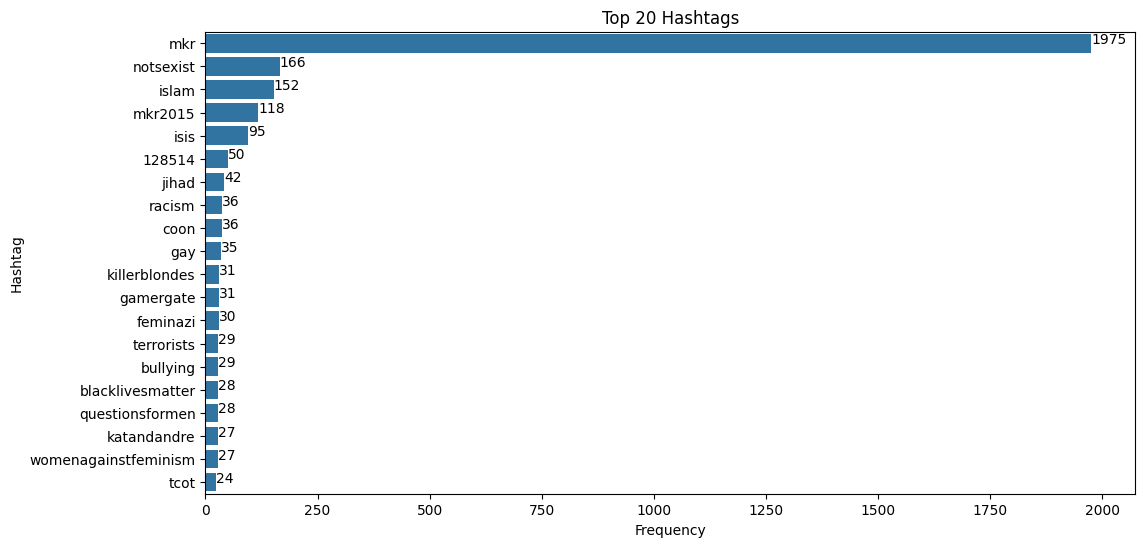

In [26]:
# Extract hashtags and their frequencies
hashtags = df['tweets'].str.findall(r'#(\w+)')  # Extract hashtags from the original tweet text
hashtags = [tag.lower() for sublist in hashtags for tag in sublist]  # Convert hashtags to lowercase
hashtags_df = pd.DataFrame(hashtags, columns=['Hashtag'])  # Create DataFrame
hashtags_df['Frequency'] = 1  # Add Frequency column
hashtags_df = hashtags_df.groupby('Hashtag').count().reset_index().sort_values(by='Frequency', ascending=False)  # Count frequencies

# Plot top hashtags
plt.figure(figsize=(12, 6))
top_hashtags = hashtags_df[:20]
ax = sns.barplot(x='Frequency', y='Hashtag', data=top_hashtags)
plt.title('Top 20 Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
for index, value in enumerate(top_hashtags['Frequency']):
    ax.text(value, index, str(value))
plt.show()

#MKR (My Kitchen Rules 2015. It breaks tweet record of other shows.)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36521 entries, 0 to 47691
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweets          36521 non-null  object
 1   cyberbullyType  36521 non-null  object
 2   text_clean      36521 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


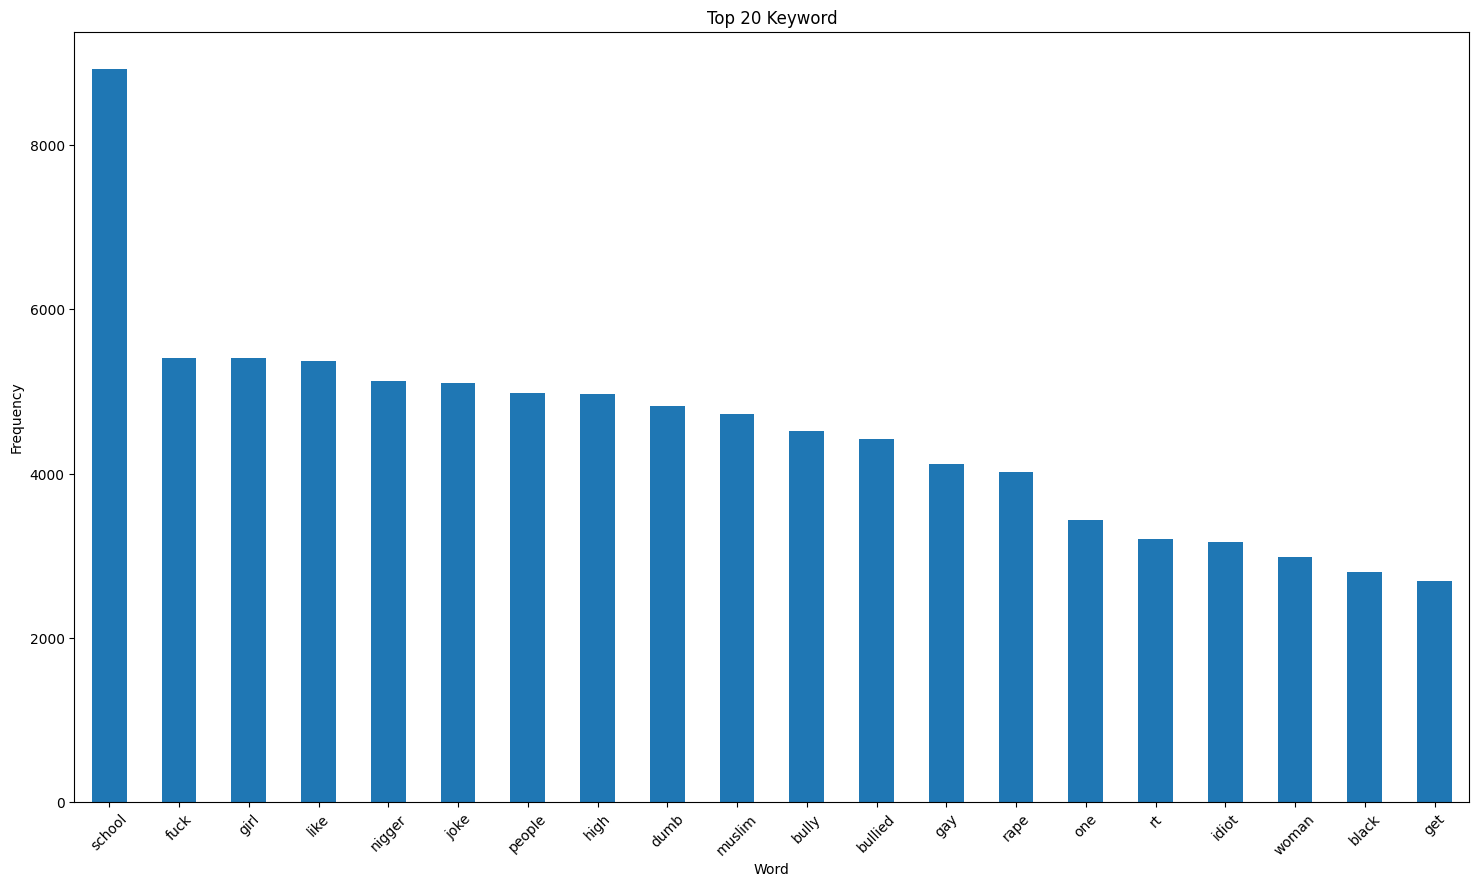

In [28]:
# # Get the text from the tweet_text column
# text = df['text_clean']

# # Split the text into individual words
# words = text.str.split()

# # Flatten the list of words
# words = [word for sublist in words for word in sublist]

# # Get the unique words and their counts
# word_counts = pd.Series(words).value_counts()

# # Convert to DataFrame
# word_counts_df = pd.DataFrame(word_counts.reset_index())
# word_counts_df.columns = ['Keyword', 'Frequency']

# # Display the DataFrame
# print(word_counts_df)



# Get the text from the tweet_text column
text = df['text_clean']

# Split the text into individual words
words = text.str.split()

# Flatten the list of words
words = [word for sublist in words for word in sublist]

# Get the unique words and their counts
word_counts = pd.Series(words).value_counts()

# Plot the top 10 most frequent words
plt.figure(figsize=(18, 10))
word_counts.head(20).plot(kind='bar')
plt.title('Top 20 Keyword')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

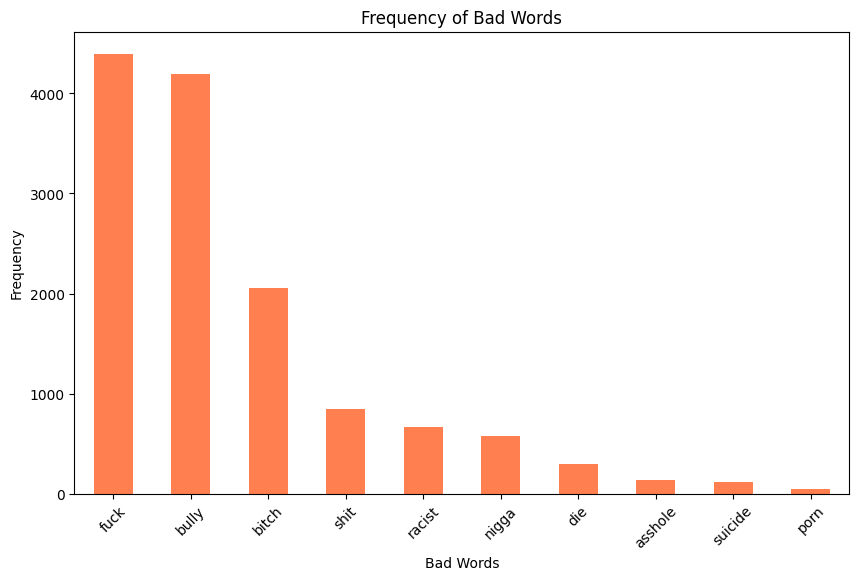

In [29]:
# List of bad words
bad_words = ['nigga', 'bitch', 'asshole', 'fuck', 'shit', 'bully', 'racist', 'suicide', 'die', 'killyourself', 'porn']

# List of good words
good_words = ['love', 'happy', 'great', 'awesome', 'wonderful', 'blessed']

def check_for_bad_words(text):
    for word in bad_words:
        if word in text:
            return word
    return None

# Apply the function to the tweet_text column
df['bad_word'] = df['text_clean'].apply(check_for_bad_words)

# Get the frequency of bad words
bad_word_frequency = df['bad_word'].value_counts()


# Plot bad word frequency
plt.figure(figsize=(10, 6))
bad_word_frequency.plot(kind='bar', color='coral')
plt.title('Frequency of Bad Words')
plt.xlabel('Bad Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Add numbers on top of the bars
for i, v in enumerate(bad_word_frequency):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom')
plt.show()

## Display the frequency of bad words print(bad_word_frequency)



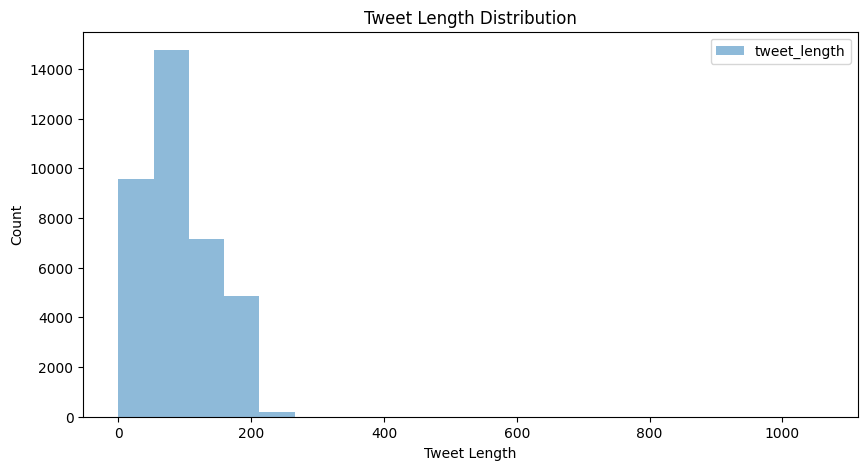

In [30]:
# Length of tweets
plt.figure(figsize=(10, 5))
df['tweet_length'] = df['text_clean'].apply(len).copy()
df['tweet_length'].plot(kind='hist', alpha=0.5, bins=20, legend=True)
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.show()

In [31]:
# # Calculate the mean and standard deviation of tweet lengths
# mean_length = df['tweet_length'].mean()
# std_length = df['tweet_length'].std()

# # Define the upper and lower bounds for outliers
# lower_bound = mean_length - 2 * std_length
# upper_bound = mean_length + 2 * std_length

# # Identify outliers
# outliers = df[(df['tweet_length'] < lower_bound) | (df['tweet_length'] > upper_bound)]

# # Plot the distribution of tweet lengths with outliers highlighted
# plt.figure(figsize=(10, 6))
# sns.histplot(df['tweet_length'], bins=range(0, 201, 10), kde=True, color='skyblue')
# plt.title('Distribution of Tweet Lengths')
# plt.xlabel('Tweet Length')
# plt.ylabel('Frequency')
# plt.xlim(0, 200)  # Set x-axis limits
# plt.xticks(range(0, 201, 10))

# # Highlight outliers
# plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
# plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
# plt.legend()

# plt.show()

# # Show the outliers
# outliers


# # Calculate mean and standard deviation of tweet lengths
# mean_length = df['tweet_length'].mean()
# std_dev_length = df['tweet_length'].std()

# # Set multiplier value
# multiplier = 2  # You can adjust this value

# # Calculate lower and upper bounds
# lower_bound = max(0, mean_length - (multiplier * std_dev_length))
# upper_bound = mean_length + (multiplier * std_dev_length)

# # Plot the distribution of tweet lengths with outliers highlighted
# plt.figure(figsize=(10, 6))
# sns.histplot(df['tweet_length'], bins=range(0, 201, 10), kde=True, color='skyblue')
# plt.title('Distribution of Tweet Lengths')
# plt.xlabel('Tweet Length')
# plt.ylabel('Frequency')
# plt.xlim(0, 200)  # Set x-axis limits
# plt.xticks(range(0, 201, 10))

# # Highlight outliers
# plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
# plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
# plt.legend()
# plt.show()
# print("Lower Bound:", lower_bound)
# print("Upper Bound:", upper_bound)



df.loc[:, 'text_len'] = [len(text.split()) for text in df['text_clean']]
df = df[df['text_len'] < df['text_len'].quantile(0.995)]
max_len = df['text_len'].max()

# Print the maximum length of the text
print("Maximum length of text after filtering:", max_len)

Maximum length of text after filtering: 31


In [32]:
Q1 = df['tweet_length'].quantile(0.25)
Q3 = df['tweet_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['tweet_length'] < lower_bound) | (df['tweet_length'] > upper_bound)]
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

if outliers.empty:
    print("No outliers found.")
else:
    print("Outliers:")
    print(outliers)

Lower Bound: -66.5
Upper Bound: 249.5
Outliers:
                                                  tweets cyberbullyType  \
16077  #ArnabExposesSonia #Secular_Terrorists_Killed_...       religion   
17295  #ArnabExposesSonia #Secular_Terrorists_Killed_...       religion   
17415  #Jihad_Jihadi_Mukt_Bharat #Sankalp_Se_Siddhi M...       religion   
23276  Invaders-Predators-Barbarians Muslims-Jihadis-...       religion   

                                              text_clean bad_word  \
16077  arnabexposessonia secularterroristskilledsadhu...     None   
17295  arnabexposessonia secularterroristskilledsadhu...     None   
17415  jihadjihadimuktbharat sankalpsesiddhi muslimsj...     None   
23276  invaderspredatorsbarbarians muslimsjihadisterr...     None   

       tweet_length  text_len  
16077           255        17  
17295           255        17  
17415           254        15  
23276           250        22  


In [33]:
# Calculate lower and upper bounds
lower_bound = df['tweet_length'].quantile(0.005)
upper_bound = df['tweet_length'].quantile(0.995)

# Filter out the tweets with outlier lengths
df = df[(df['tweet_length'] >= lower_bound) & (df['tweet_length'] <= upper_bound)]

# Check if all tweets fall within the acceptable range
all_within_bounds = df['tweet_length'].between(lower_bound, upper_bound).all()

# Print the result
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

if all_within_bounds:
    print("No outliers found.")
else:
    print("Tweets outside the acceptable range:")
    print(df[(df['tweet_length'] < lower_bound) | (df['tweet_length'] > upper_bound)])

Lower Bound: 15.0
Upper Bound: 210.0
No outliers found.


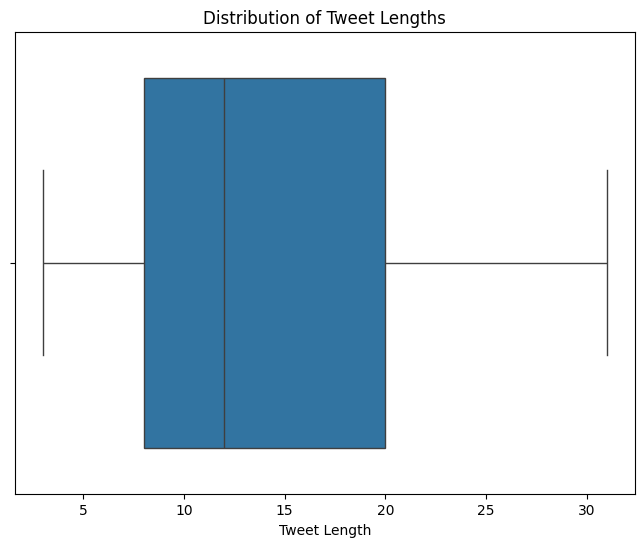

In [34]:
# Create a box plot to visualize tweet lengths
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['text_len'])
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.show()

In [35]:
# lower_bound = 0
# upper_bound = 194.53169976769453

# # Remove tweets with lengths outside the lower and upper bounds
# filtered_df = df[(df['tweet_length'] >= lower_bound) & (df['tweet_length'] <= upper_bound)]

# # Check if all tweets fall within the upper and lower bounds
# print("All tweets fall within the upper and lower bounds:", len(df) == len(filtered_df))

# EDA Processing

Labelling each classes

In [36]:
# cyberbullyType = ["religion","age","ethnicity","gender","not bullying"]
# label_mapping = {'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4}
# df['cyberbullyType'] = df['cyberbullyType'].map(label_mapping)

# Define the label mapping dictionary
label_mapping = {'religion': 0, 'minor': 1, 'racism': 2, 'gender': 3, 'not_cyberbullying': 4}

# Create a new column with numerical labels based on the existing 'cyberbullyType' column
df.insert(df.columns.get_loc('cyberbullyType') + 1, 'cyberbullyType_label', df['cyberbullyType'].map(label_mapping))




In [37]:
df.head(100)

,tweets,cyberbullyType,cyberbullyType_label,text_clean,bad_word,tweet_length,text_len
0,"In other words #katandandre, your food was cra...",not_cyberbullying,4,word katandandre food crapilicious mkr,None,38,5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,4,aussietv white mkr theblock imacelebrityau tod...,None,91,11
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,4,classy whore red velvet cupcake,None,31,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,4,meh thanks head concerned another angry dude t...,None,52,8
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,4,isi account pretending kurdish account like is...,None,53,8
...,...,...,...,...,...,...,...
126,"Sure is Monday! Up at 4am for work, the boss i...",not_cyberbullying,4,sure monday am work bos bad mood messed schedu...,None,71,13
127,#MKR my guess. bottom 2 teams from each round ...,not_cyberbullying,4,mkr guess bottom team round going back instant...,None,64,10
128,@Lovemycoffeetoo @hidden_horcrux there were 4 ...,not_cyberbullying,4,top team ea round amp adamandcarol top round a...,None,62,12
129,When someone gets bitten by a rabid dog and ha...,not_cyberbullying,4,someone get bitten rabid dog get six inch need...,None,79,13


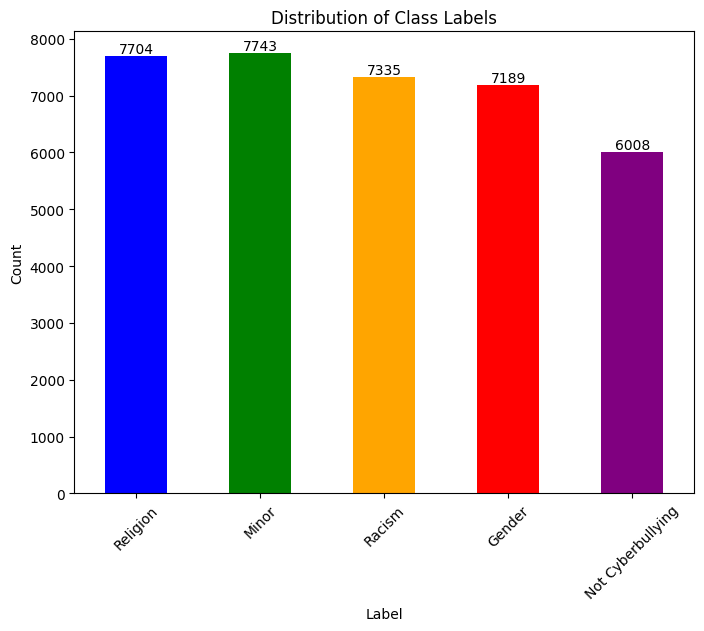

In [38]:
# Assuming 'class_label' is the column containing class labels
class_counts = df['cyberbullyType_label'].value_counts()

# Reorder index
class_counts = class_counts.sort_index()

# Define colors for each bar
colors = ['blue', 'green', 'orange', 'red', 'purple']

# Plot bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Class Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)


# Add count numbers on top of each bar
for i, count in enumerate(class_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Add class labels under each bar
class_labels = ['Religion', 'Minor', 'Racism', 'Gender', 'Not Cyberbullying']
plt.xticks(range(len(class_labels)), class_labels, rotation=45)

plt.show()

In [39]:
#Display new column for cyberbullyType_label
df.tail(10)

,tweets,cyberbullyType,cyberbullyType_label,text_clean,bad_word,tweet_length,text_len
47682,But... he’s right. Atlanta is full of so calle...,racism,2,right atlanta full called shoot negro wendys b...,None,110,17
47683,Black is a color . African American is a Cultu...,racism,2,black color african american culture nigger me...,fuck,78,12
47684,"After black soldiers fought in WWI, many of th...",racism,2,black soldier fought wwi many came home refusi...,die,163,27
47685,@KeithBishop64 Very true. It was a nice show t...,racism,2,true nice show watch racism incident ricky pic...,None,61,10
47686,@YourFavWhiteGuy shut the fuck upAbout your du...,racism,2,shut fuck upabout dumb app acting like nagging...,fuck,53,9
47687,"Black ppl aren't expected to do anything, depe...",racism,2,black people expected anything depended anythi...,None,149,21
47688,Turner did not withhold his disappointment. Tu...,racism,2,turner withhold disappointment turner called c...,None,203,29
47689,I swear to God. This dumb nigger bitch. I have...,racism,2,swear god dumb nigger bitch got bleach hair re...,bitch,71,13
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,racism,2,yea fuck rt nigger fucking unfollow fucking du...,fuck,55,9
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,racism,2,bro got chill rt dog fuck kp dumb nigger bitch...,bitch,51,11


Sentiment Analysis

In [40]:
# Create a list to store sentiment analysis results
sentiments = []

# Iterate over the 'text_clean' column of the DataFrame
for tweet in df['text_clean']:
    analysis = TextBlob(tweet)
    # Get the polarity score (-1 for negative, 0 for neutral, 1 for positive)
    polarity = analysis.sentiment.polarity
    # Classify the sentiment based on polarity score
    if polarity > 0:
        sentiment = 'positive'
    elif polarity < 0:
        sentiment = 'negative'
    else:
        sentiment = None
    # Append the sentiment to the list
    sentiments.append(sentiment)

# Add the list of sentiments as a new column to the DataFrame
df['sentiment'] = sentiments

# Remove rows with neutral sentiment
df = df[df['sentiment'].notnull()]

Categorical Distribution

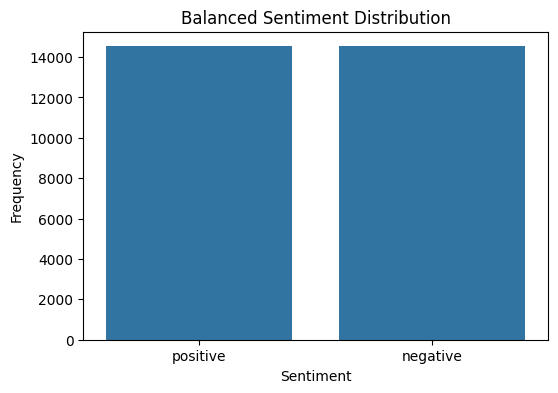

In [41]:
# Separate positive and negative sentiment tweets
positive_sentiment = df[df['sentiment'] == 'positive']
negative_sentiment = df[df['sentiment'] == 'negative']

# Get the number of positive sentiment tweets
num_positive = len(positive_sentiment)

# Undersample negative sentiment tweets to match the number of positive sentiment tweets
undersampled_negative = negative_sentiment.sample(n=num_positive, random_state=42)

# Concatenate positive sentiment tweets and undersampled negative sentiment tweets
balanced_df = pd.concat([positive_sentiment, undersampled_negative])

# Check the distribution of sentiments in the balanced dataset
balanced_sentiment_distribution = balanced_df['sentiment'].value_counts()

# Plot the distribution of sentiments in the balanced dataset
plt.figure(figsize=(6, 4))
sns.barplot(x=balanced_sentiment_distribution.index, y=balanced_sentiment_distribution.values)
plt.title('Balanced Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

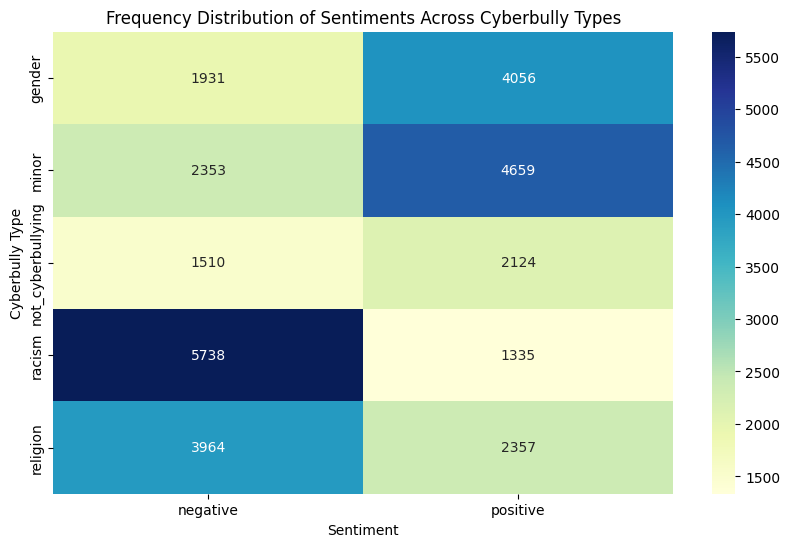

In [42]:
# Create a pivot table to calculate the frequency distribution of sentiments across cyberbully types
pivot_table = df.pivot_table(index='cyberbullyType', columns='sentiment', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Frequency Distribution of Sentiments Across Cyberbully Types')
plt.xlabel('Sentiment')
plt.ylabel('Cyberbully Type')
plt.show()

Word Cloud

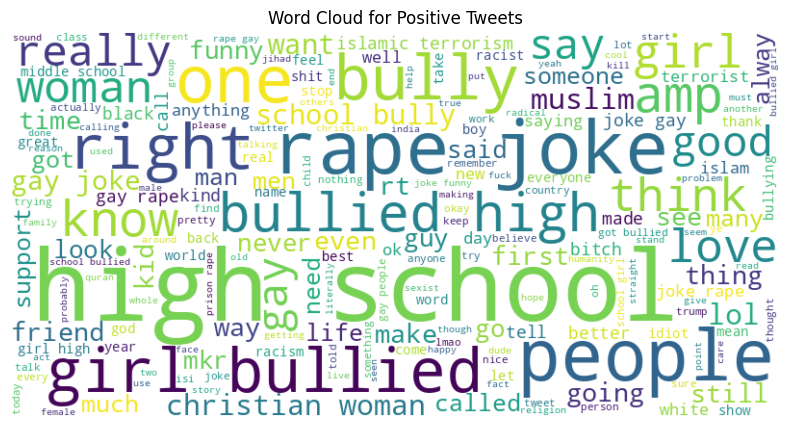

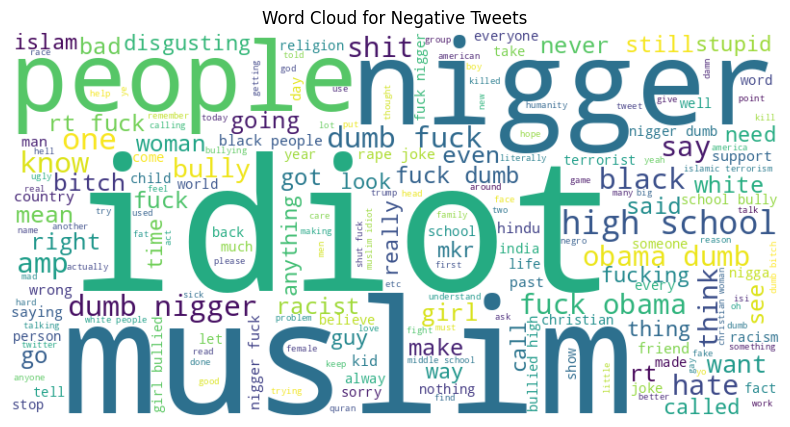

In [43]:
# Assuming you have separate text data for negative and positive sentiments
negative_text = " ".join(df[df['sentiment'] == 'negative']['text_clean'])
positive_text = " ".join(df[df['sentiment'] == 'positive']['text_clean'])

# Generate word clouds for negative sentiment
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Generate word clouds for positive sentiment
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Word cloud for positive tweets
positive_tweets = df[df['sentiment'] == 'positive']['text_clean'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Tweets')
plt.axis('off')
plt.show()

# Word cloud for negative tweets
negative_tweets = df[df['sentiment'] == 'negative']['text_clean'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Tweets')
plt.axis('off')
plt.show()

In [44]:
# Function to extract and count hashtags
def extract_hashtags(sentiment):
    hashtags = df[df['sentiment'] == sentiment]['tweets'].str.findall(r'#(\w*[a-zA-Z]+\w*)')
    hashtags_flat = [re.sub(r'\d+', '', tag.lower()) for sublist in hashtags for tag in sublist]
    return pd.Series(hashtags_flat).value_counts()

# Extract and count positive hashtags
positive_hashtags_count = extract_hashtags('positive')

# Extract and count negative hashtags
negative_hashtags_count = extract_hashtags('negative')

# Display the top 10 positive and negative hashtags
print("\nPositive Hashtags:")
print(positive_hashtags_count.head(20))
print("\nNegative Hashtags:")
print(negative_hashtags_count.head(20))


Positive Hashtags:
mkr           633
notsexist      59
islam          49
isis           32
gay            28
jihad          21
lgbt           16
mileycyrus     15
gamergate      15
rape           15
racism         14
terrorists     13
christian      13
metoo          13
coon           12
p              12
news           11
feminazi       11
bb             11
bullying       11
Name: count, dtype: int64

Negative Hashtags:
mkr                 611
notsexist            50
islam                27
nigger               21
isis                 19
niggers              17
blacklivesmatter     17
obama                16
racism               14
katandandre          12
idiot                12
maga                 11
blm                   9
killerblondes         9
muslims               9
muslim                9
israel                9
coon                  8
idiots                8
disgusting            8
Name: count, dtype: int64


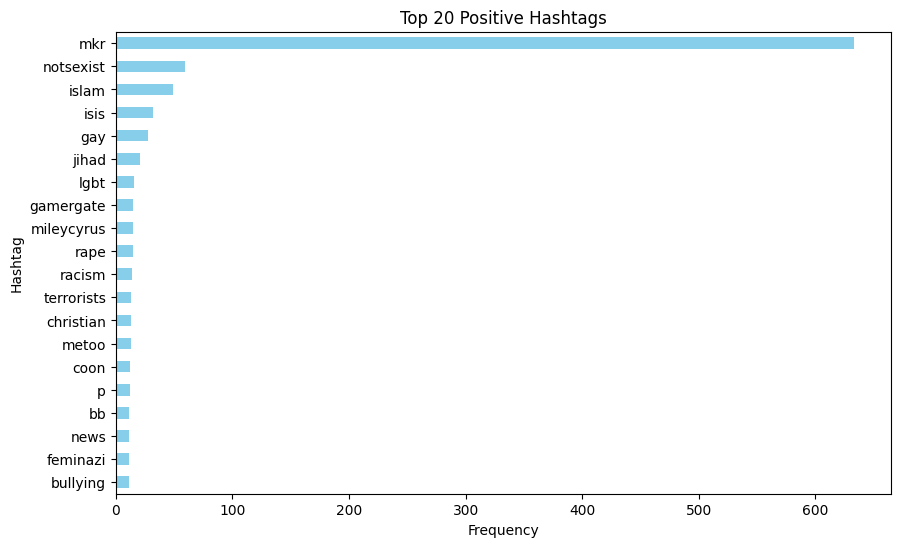

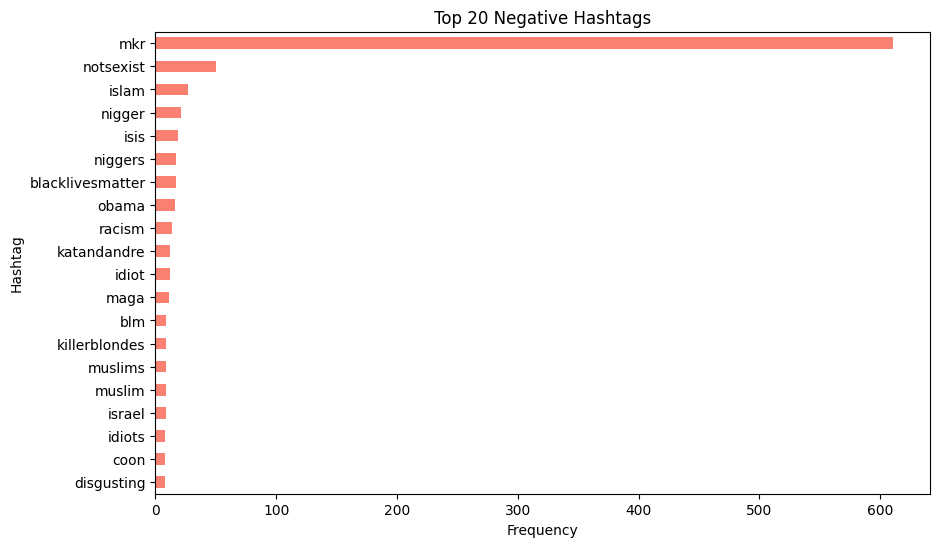

In [45]:
# Plot positive hashtags
plt.figure(figsize=(10, 6))
positive_hashtags_count.head(20).sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 20 Positive Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.show()

# Plot negative hashtags
plt.figure(figsize=(10, 6))
negative_hashtags_count.head(20).sort_values().plot(kind='barh', color='salmon')
plt.title('Top 20 Negative Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.show()

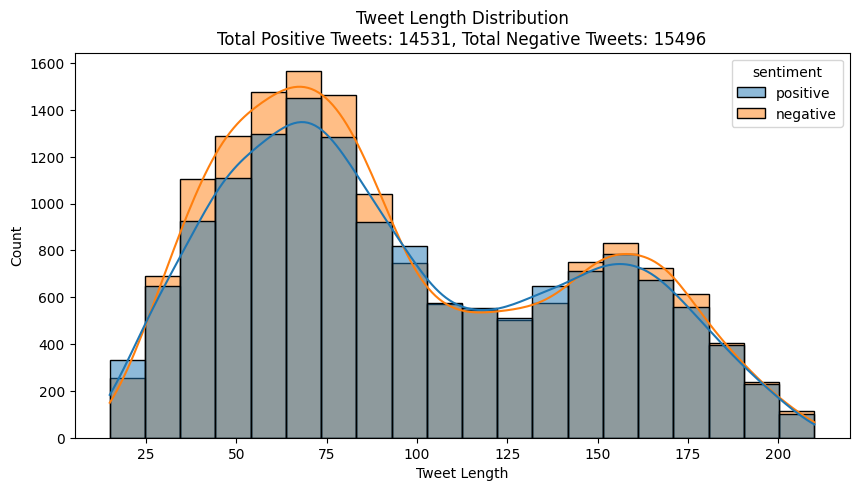

In [46]:
# Calculate total positive and negative tweets
total_positive_tweets = len(df[df['sentiment'] == 'positive'])
total_negative_tweets = len(df[df['sentiment'] == 'negative'])

# KDE plot for tweet length distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='tweet_length', hue='sentiment', kde=True, alpha=0.5, bins=20)
plt.title(f'Tweet Length Distribution\nTotal Positive Tweets: {total_positive_tweets}, Total Negative Tweets: {total_negative_tweets}')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.show()

In [47]:
# # Top 20 Bi-grams in Positive Tweets
# plt.figure(figsize=(10, 8))
# sns.barplot(x=positive_bigram_freq[0], y=positive_bigram_freq.index, hue=positive_bigram_freq.index, palette="Greens_d", dodge=False)
# plt.title('Top 20 Bi-grams in Positive Tweets')
# plt.xlabel('Frequency')
# plt.ylabel('Bi-grams')
# plt.legend('')
# plt.show()

# # Top 20 Bi-grams in Negative Tweets
# plt.figure(figsize=(10, 8))
# sns.barplot(x=negative_bigram_freq[0], y=negative_bigram_freq.index, hue=negative_bigram_freq.index, palette="Reds_d", dodge=False)
# plt.title('Top 20 Bi-grams in Negative Tweets')
# plt.xlabel('Frequency')
# plt.ylabel('Bi-grams')
# plt.legend('')
# plt.show()

In [51]:
# # Tokenize positive tweets into bi-grams
# positive_tweets = df[df['sentiment'] == 'positive']['text_clean']
# positive_bigrams = [bigram for tweet in positive_tweets for bigram in nltk.ngrams(tweet.split(), 2)]

# # Calculate frequency distribution of bi-grams in positive tweets
# positive_bigram_freq = nltk.FreqDist(positive_bigrams)

# # Convert frequency distribution to DataFrame for easier manipulation
# positive_bigram_freq = pd.DataFrame(positive_bigram_freq.items(), columns=['Bi-gram', 'Frequency'])

# # Sort the DataFrame by frequency in descending order
# positive_bigram_freq = positive_bigram_freq.sort_values(by='Frequency', ascending=False).head(20)

# # Tokenize negative tweets into bi-grams
# negative_tweets = df[df['sentiment'] == 'negative']['text_clean']
# negative_bigrams = [bigram for tweet in negative_tweets for bigram in nltk.ngrams(tweet.split(), 2)]

# # Calculate frequency distribution of bi-grams in negative tweets
# negative_bigram_freq = nltk.FreqDist(negative_bigrams)

# # Convert frequency distribution to DataFrame for easier manipulation
# negative_bigram_freq = pd.DataFrame(negative_bigram_freq.items(), columns=['Bi-gram', 'Frequency'])

# # Sort the DataFrame by frequency in descending order
# negative_bigram_freq = negative_bigram_freq.sort_values(by='Frequency', ascending=False).head(20)

# # Now you can plot the top 20 bi-grams in positive and negative tweets


In [ ]:
# # Convert the index of the DataFrame to strings
# positive_bigram_freq_df['Bi-gram'] = positive_bigram_freq_df['Bi-gram'].apply(lambda x: ' '.join(x))

# # Now you can plot the top 20 bi-grams in positive tweets
# plt.figure(figsize=(10, 8))
# sns.barplot(x='Frequency', y='Bi-gram', data=positive_bigram_freq_df, palette="Greens_d")
# plt.title('Top 20 Bi-grams in Positive Tweets')
# plt.xlabel('Frequency')
# plt.ylabel('Bi-grams')
# plt.show()


In [ ]:
# # Convert the index of the DataFrame to strings
# negative_bigram_freq_df['Bi-gram'] = negative_bigram_freq_df['Bi-gram'].apply(lambda x: ' '.join(x))

# # Now you can plot the top 20 bi-grams in negative tweets
# plt.figure(figsize=(10, 8))
# sns.barplot(x='Frequency', y='Bi-gram', data=negative_bigram_freq_df, palette="Reds_d")
# plt.title('Top 20 Bi-grams in Negative Tweets')
# plt.xlabel('Frequency')
# plt.ylabel('Bi-grams')
# plt.show()


<ipython-input-53-b400be334c20>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bi-gram', data=positive_bigram_freq_df, palette="Greens_d")


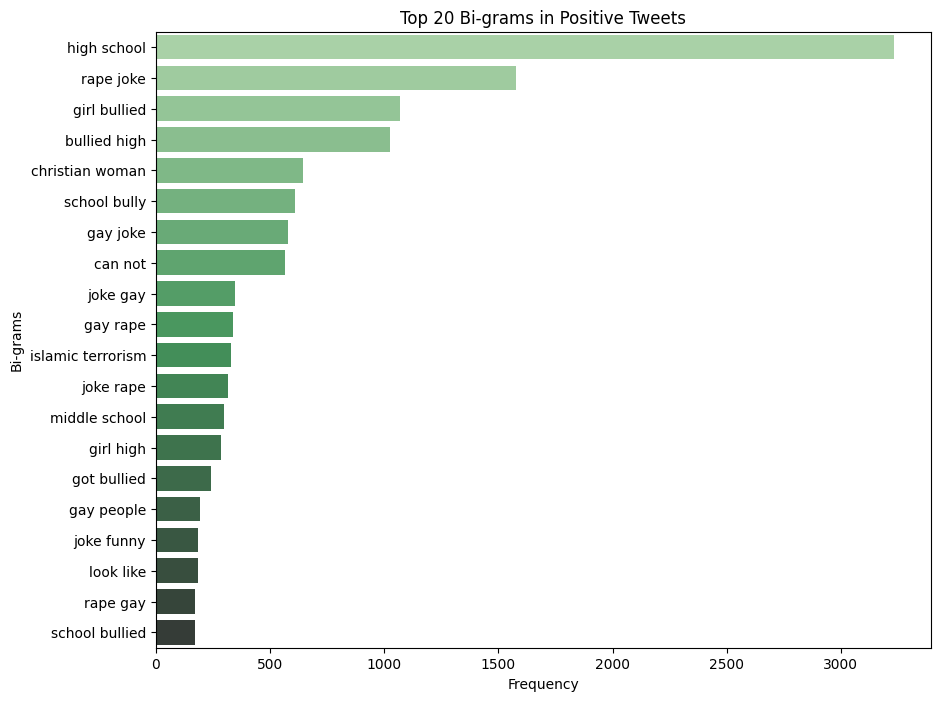

<ipython-input-53-b400be334c20>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bi-gram', data=negative_bigram_freq_df, palette="Reds_d")


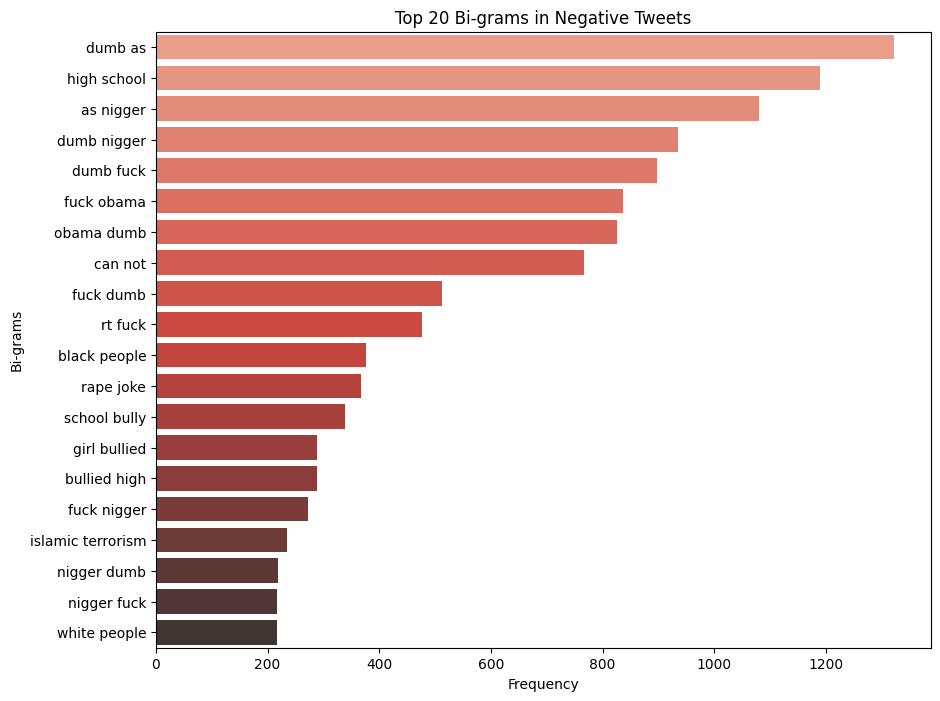

In [53]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Tokenize positive tweets into bi-grams
positive_tweets = df[df['sentiment'] == 'positive']['text_clean']
positive_bigrams = [bigram for tweet in positive_tweets for bigram in nltk.ngrams(tweet.split(), 2)]

# Calculate frequency distribution of bi-grams in positive tweets
positive_bigram_freq = nltk.FreqDist(positive_bigrams)

# Convert frequency distribution to DataFrame for easier manipulation
positive_bigram_freq_df = pd.DataFrame(positive_bigram_freq.items(), columns=['Bi-gram', 'Frequency'])

# Sort the DataFrame by frequency in descending order
positive_bigram_freq_df = positive_bigram_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Tokenize negative tweets into bi-grams
negative_tweets = df[df['sentiment'] == 'negative']['text_clean']
negative_bigrams = [bigram for tweet in negative_tweets for bigram in nltk.ngrams(tweet.split(), 2)]

# Calculate frequency distribution of bi-grams in negative tweets
negative_bigram_freq = nltk.FreqDist(negative_bigrams)

# Convert frequency distribution to DataFrame for easier manipulation
negative_bigram_freq_df = pd.DataFrame(negative_bigram_freq.items(), columns=['Bi-gram', 'Frequency'])

# Sort the DataFrame by frequency in descending order
negative_bigram_freq_df = negative_bigram_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Now you can plot the top 20 bi-grams in positive tweets
# Convert the index of the DataFrame to strings
positive_bigram_freq_df['Bi-gram'] = positive_bigram_freq_df['Bi-gram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Bi-gram', data=positive_bigram_freq_df, palette="Greens_d")
plt.title('Top 20 Bi-grams in Positive Tweets')
plt.xlabel('Frequency')
plt.ylabel('Bi-grams')
plt.show()

# Now you can plot the top 20 bi-grams in negative tweets
# Convert the index of the DataFrame to strings
negative_bigram_freq_df['Bi-gram'] = negative_bigram_freq_df['Bi-gram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Bi-gram', data=negative_bigram_freq_df, palette="Reds_d")
plt.title('Top 20 Bi-grams in Negative Tweets')
plt.xlabel('Frequency')
plt.ylabel('Bi-grams')
plt.show()


Keyword Analysis

Text Length Distribution

In [54]:
#Specify the file path where you want to save the CSV file
# file_path = r'C\Users\USER\Desktop\WQD7001 PRINCIPLES OF DATA SCIENCE\Assignment\cleaned_data.csv'
# Use the to_csv() method to save the DataFrame to a CSV file
# df.to_csv(file_path, index=False)
# df.to_csv(file_path)

df.to_csv("/content/gdrive/My Drive/Colab Notebooks/Cleaned Data.csv")

# **Feature Engineering**

Extract relevant features from the cleaned text data or create new features if necessary.

For feature engineering, we'll use TF-IDF (Term Frequency-Inverse Document Frequency) to convert the text data into numerical features.

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit TF-IDF vectorizer and transform the 'text_clean' column
X_tfidf = tfidf_vectorizer.fit_transform(df['text_clean'])

# Convert the TF-IDF matrix into a DataFrame for easier handling
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())


    aa   ab  abandoned  abdul  ability  able  ableist  abortion  abroad  \
0  0.0  0.0        0.0    0.0      0.0   0.0      0.0       0.0     0.0   
1  0.0  0.0        0.0    0.0      0.0   0.0      0.0       0.0     0.0   
2  0.0  0.0        0.0    0.0      0.0   0.0      0.0       0.0     0.0   
3  0.0  0.0        0.0    0.0      0.0   0.0      0.0       0.0     0.0   
4  0.0  0.0        0.0    0.0      0.0   0.0      0.0       0.0     0.0   

   absolute  ...  yuh  yummy  yup  yur  zero  zimmerman  zionist  zombie  \
0       0.0  ...  0.0    0.0  0.0  0.0   0.0        0.0      0.0     0.0   
1       0.0  ...  0.0    0.0  0.0  0.0   0.0        0.0      0.0     0.0   
2       0.0  ...  0.0    0.0  0.0  0.0   0.0        0.0      0.0     0.0   
3       0.0  ...  0.0    0.0  0.0  0.0   0.0        0.0      0.0     0.0   
4       0.0  ...  0.0    0.0  0.0  0.0   0.0        0.0      0.0     0.0   

   zone  zoo  
0   0.0  0.0  
1   0.0  0.0  
2   0.0  0.0  
3   0.0  0.0  
4   0.0  0.0  

[

# **Split Data**

Split the dataset into training and testing sets.

In [56]:
from sklearn.model_selection import train_test_split

X = df['text_clean']  # Features
y = df['cyberbullyType_label']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Model Selection & Training**

We'll choose a few common machine learning models for classification: Logistic Regression, Multinomial Naive Bayes, Support Vector Machine (SVM), Random Forest, and Gradient Boosting.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier



# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['cyberbullyType_label'], test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)

# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1314
           1       0.97      0.99      0.98      1335
           2       0.98      0.99      0.98      1457
           3       0.96      0.89      0.93      1201
           4       0.77      0.83      0.80       699

    accuracy                           0.95      6006
   macro avg       0.93      0.93      0.93      6006
weighted avg       0.95      0.95      0.95      6006

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1314
           1       0.81      0.98      0.89      1335
           2       0.91      0.92      0.91      1457
           3       0.91      0.88      0.89      1201
           4       0.72      0.33      0.45       699

    accuracy                           0.87      6006
   macro avg       0.85      0.81      0.81  

# **Model Evaluation**

We'll evaluate the models using accuracy and F1-score.

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define lists to store evaluation metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)

    # Append evaluation metrics to lists
    model_names.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print evaluation metrics
    print(f"Evaluation metrics for {name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{confusion}\n")

# Create a DataFrame to display evaluation metrics
evaluation_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
})

# Display the DataFrame
print("Model Evaluation Metrics:")
print(evaluation_df)


Evaluation metrics for Logistic Regression:
Accuracy: 0.9455544455544456
Precision: 0.9474142291705223
Recall: 0.9455544455544456
F1-score: 0.9460758400423993
Confusion Matrix:
[[1268    1    4    2   39]
 [   1 1315    0    2   17]
 [   2    0 1441    3   11]
 [   7    4    6 1074  110]
 [  17   40   21   40  581]]

Evaluation metrics for Naive Bayes:
Accuracy: 0.8661338661338661
Precision: 0.859356323829175
Recall: 0.8661338661338661
F1-score: 0.85176708083074
Confusion Matrix:
[[1276   12   11    7    8]
 [   6 1307    8    6    8]
 [  38   56 1339   12   12]
 [  24   32   33 1052   60]
 [  97  209   83   82  228]]

Evaluation metrics for SVM:
Accuracy: 0.9462204462204462
Precision: 0.94911469043478
Recall: 0.9462204462204462
F1-score: 0.9469678549351852
Confusion Matrix:
[[1273    1    3    2   35]
 [   0 1314    0    1   20]
 [   1    0 1444    3    9]
 [   4    6    3 1062  126]
 [  17   43   20   29  590]]

Evaluation metrics for Random Forest:
Accuracy: 0.9523809523809523
Preci

# **Hyperparameter Tuning (Optional)**

We can perform hyperparameter tuning for selected models to optimize their performance.

In [ ]:
# from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# from sklearn.metrics import classification_report
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['cyberbullyType_label'], test_size=0.2, random_state=42)

# # Initialize models with default hyperparameters
# models = {
#     'Logistic Regression': LogisticRegression(),
#     'Naive Bayes': MultinomialNB(),
#     'SVM': SVC(),
#     'Random Forest': RandomForestClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier()
# }

# # Define hyperparameters grid for each model
# param_grid = {
#     'Logistic Regression': {
#         'C': [0.001, 0.01, 0.1, 1, 10, 100],
#         'max_iter': [100, 200, 300, 400, 500],
#         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#     },
#     'Naive Bayes': {},  # No hyperparameters to tune for Naive Bayes
#     'SVM': {
#         'C': [0.1, 1, 10, 100],
#         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#     },
#     'Random Forest': {
#         'n_estimators': [50, 100, 200, 300],
#         'max_depth': [None, 10, 20, 30],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4]
#     },
#     'Gradient Boosting': {
#         'n_estimators': [50, 100, 200, 300],
#         'learning_rate': [0.01, 0.05, 0.1, 0.2],
#         'max_depth': [3, 4, 5, 6]
#     }
# }

# # Perform hyperparameter tuning using Grid Search
# def grid_search_tuning(model, param_grid):
#     grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
#     grid_search.fit(X_train, y_train)
#     best_params = grid_search.best_params_
#     best_model = grid_search.best_estimator_
#     return best_params, best_model

# # Perform hyperparameter tuning for each model
# best_params = {}
# best_models = {}

# for name, model in models.items():
#     if name in param_grid:
#         params, best_model = grid_search_tuning(model, param_grid[name])
#     else:
#         params = {}  # If no hyperparameters to tune, use empty dictionary
#         best_model = model
#     best_params[name] = params
#     best_models[name] = best_model

# # Print the best parameters for each model
# for name, params in best_params.items():
#     print(f"Best parameters for {name}: {params}")

# # Evaluate the best models
# for name, model in best_models.items():
#     y_pred = model.predict(X_test)
#     print(f"Classification Report for {name}:")
#     print(classification_report(y_test, y_pred))


# **Final Evaluation (Optional if Hyperparameter Tuning is done)**

After hyperparameter tuning, retrain the models with the best parameters and evaluate them on the testing set.

In [ ]:
# # Retrain models with best parameters
# best_logistic = LogisticRegression(**best_params)
# best_logistic.fit(X_train_tfidf, y_train)

# # Evaluate the best model
# y_pred_best = best_logistic.predict(X_test_tfidf)
# accuracy_best = accuracy_score(y_test, y_pred_best)
# f1_best = f1_score(y_test, y_pred_best, average='weighted')

# # Display final evaluation metrics
# print("Final Evaluation Metrics for Logistic Regression:")
# print("Accuracy:", accuracy_best)
# print("F1-score:", f1_best)


# **Error Handling**

Error handling ensures that your code can gracefully handle unexpected errors and exceptions. You can use try-except blocks to catch and handle errors. Here's how to add error handling to your code:



In [73]:
try:
    print(x)
except NameError:
    print("Variable x is not defined")
except Exception as e:
    print(f"An exception occurred: {e}")


Variable x is not defined
